<a href="https://colab.research.google.com/github/MathieuFan22/Mirada-Examen-ML-M2-ISPM/blob/Safidy/PoketraFinday-Mirada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0


In [127]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  30000 non-null  object
 1   step            30000 non-null  int64 
 2   type            30000 non-null  object
 3   amount          30000 non-null  int64 
 4   customer_id     30000 non-null  object
 5   age             30000 non-null  int64 
 6   is_fraud        30000 non-null  int64 
 7   hour            30000 non-null  int64 
 8   day             30000 non-null  int64 
 9   day_of_week     30000 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 2.3+ MB


In [129]:
print(train_data.duplicated().sum())

0


In [209]:
train_data['hour'] = (train_data['step'] - 1) % 24
train_data['day_of_week'] = ((train_data['step'] - 1) // 24) % 7
train_data['day'] = ((train_data['step'] - 1) // 24) + 1

test_data['hour'] = (test_data['step'] - 1) % 24
test_data['day_of_week'] = ((test_data['step'] - 1) // 24) % 7
test_data['day'] = ((test_data['step'] - 1) // 24) + 1

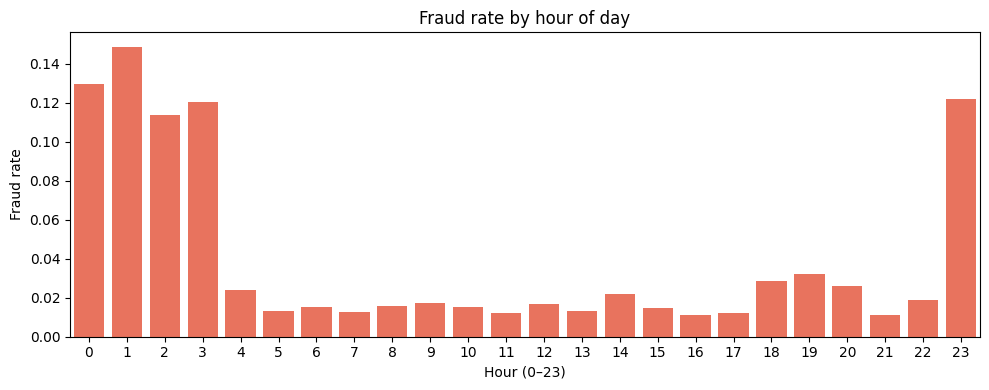

In [125]:
plt.figure(figsize=(10,4))
hour_stats = train_data.groupby('hour')['is_fraud'].mean()
sns.barplot(x=hour_stats.index, y=hour_stats.values, color='tomato')
plt.title("Fraud rate by hour of day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.show()

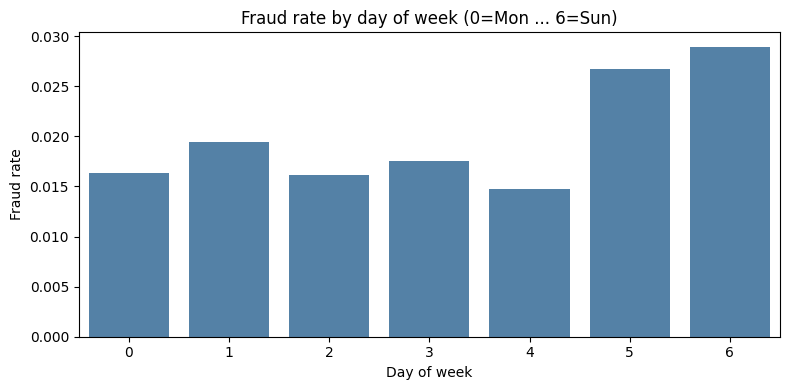

In [126]:
plt.figure(figsize=(8,4))
dow_stats = train_data.groupby('day_of_week')['is_fraud'].mean()
sns.barplot(x=dow_stats.index, y=dow_stats.values, color='steelblue')
plt.title("Fraud rate by day of week (0=Mon ... 6=Sun)")
plt.xlabel("Day of week")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.show()

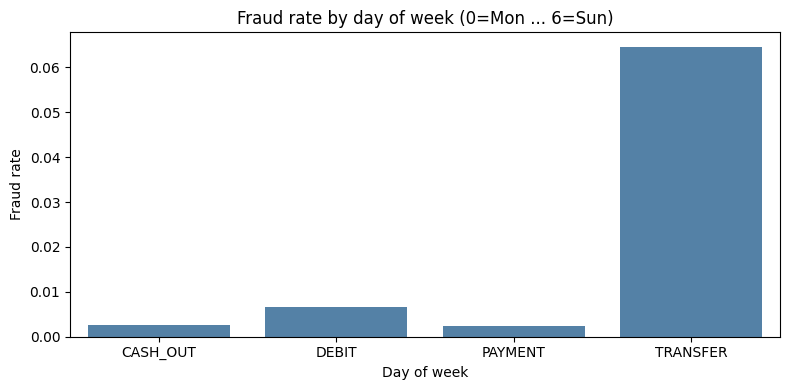

In [150]:
plt.figure(figsize=(8,4))
dow_stats = train_data.groupby('type')['is_fraud'].mean()
sns.barplot(x=dow_stats.index, y=dow_stats.values, color='steelblue')
plt.title("Fraud rate by day of week (0=Mon ... 6=Sun)")
plt.xlabel("Day of week")
plt.ylabel("Fraud rate")
plt.tight_layout()
plt.show()

## Conclusion: Heure a une impact sur les fraudes

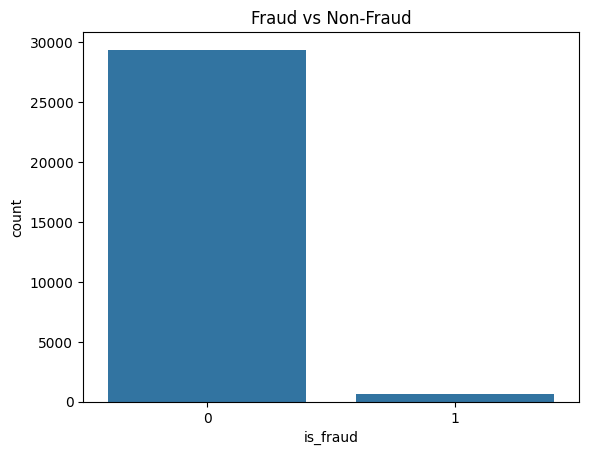

In [131]:
sns.countplot(x='is_fraud', data=train_data)
plt.title("Fraud vs Non-Fraud")
plt.show()

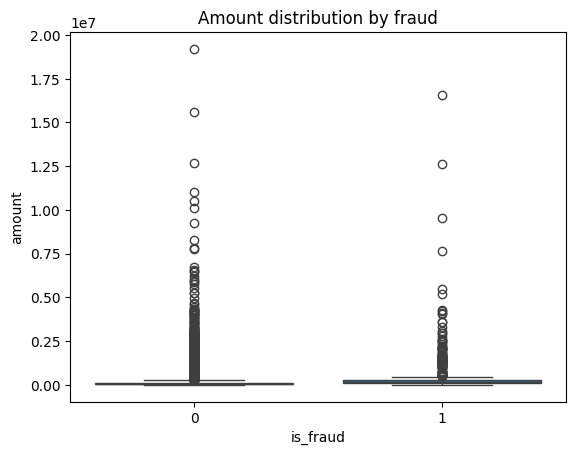

In [146]:
sns.boxplot(x='is_fraud', y='amount', data=train_data)
plt.title("Amount distribution by fraud")
plt.show()

In [144]:
import numpy as np
min = train_data['amount'].min()
max = train_data['amount'].max()
amount_groups = np.linspace(min, max, 11)
train_data['amount_group'] = pd.cut(train_data['amount'], bins=amount_groups)
train_data.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud,hour,day,day_of_week,amount_group
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0,12,18,3,"(100.0, 1921490.0]"
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0,12,14,6,"(100.0, 1921490.0]"
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0,12,24,2,"(100.0, 1921490.0]"
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0,6,22,0,"(100.0, 1921490.0]"
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0,14,3,2,"(100.0, 1921490.0]"


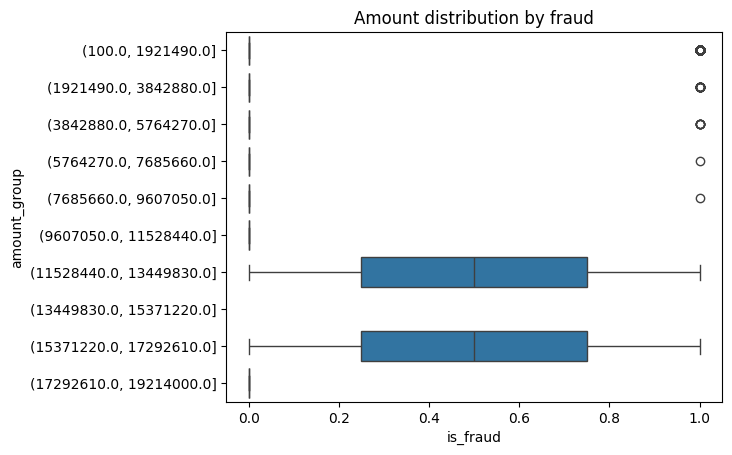

In [149]:
sns.boxplot(x='is_fraud', y='amount_group', data=train_data)
plt.title("Amount distribution by fraud")
plt.show()

## Avec la colonne amount

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# Load dataset
df = train_data

# --- Select only amount, hour, and type ---
features = ['amount', 'hour', 'type']

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'])

# Define X and y
X = df[['amount', 'hour'] + [col for col in df.columns if col.startswith('type_')]]
y = df['is_fraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Scale numerical features (amount, hour)
scaler = StandardScaler()
X_train[['amount','hour']] = scaler.fit_transform(X_train[['amount','hour']])
X_test[['amount','hour']] = scaler.transform(X_test[['amount','hour']])

# Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


F1 Score: 0.12550164173659248
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      8822
           1       0.07      0.97      0.13       178

    accuracy                           0.73      9000
   macro avg       0.53      0.85      0.48      9000
weighted avg       0.98      0.73      0.83      9000



## Sans la clolonne amount

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# Load dataset
df = train_data

# --- Select only amount, hour, and type ---
features = ['hour', 'type']

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'])

# Define X and y
X = df[['hour'] + [col for col in df.columns if col.startswith('type_')]]
y = df['is_fraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# Scale numerical features (amount, hour)
scaler = StandardScaler()
X_train[['hour']] = scaler.fit_transform(X_train[['hour']])
X_test[['hour']] = scaler.transform(X_test[['hour']])

# Logistic Regression model
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


F1 Score: 0.12146676852559206
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8822
           1       0.07      0.89      0.12       178

    accuracy                           0.74      9000
   macro avg       0.53      0.82      0.49      9000
weighted avg       0.98      0.74      0.84      9000



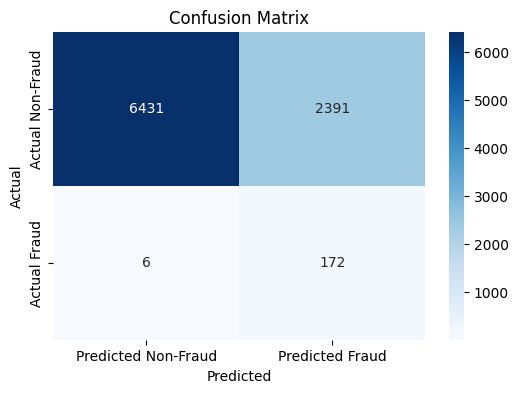

True Negatives: 6431
False Positives: 2391
False Negatives: 6
True Positives: 172


In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_test (true labels) and y_pred (model predictions) are available
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud','Predicted Fraud'],
            yticklabels=['Actual Non-Fraud','Actual Fraud'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Extract values
TN, FP, FN, TP = cm.ravel()
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")